In [16]:
from src.preprocess.text import TextDataProcessor, Corpus
from src.models.lsa import LSAModel
import pandas as pd


In [17]:
# %%
df_text = pd.read_csv(
    "/Users/Mikhail_Bulgakov/GitRepo/topic-modeling/data/clean_text_preprocessed_lemma_.csv"
)


In [18]:
# %%
doc_clean, dictionary, doc_term_matrix = Corpus().prepare(
    df_text["clean_text_array_norm"].str.split(" ")
)

In [19]:
# %%
lsamodel = LSAModel(framework="gensim")

100%|██████████| 13/13 [06:05<00:00, 28.12s/it]


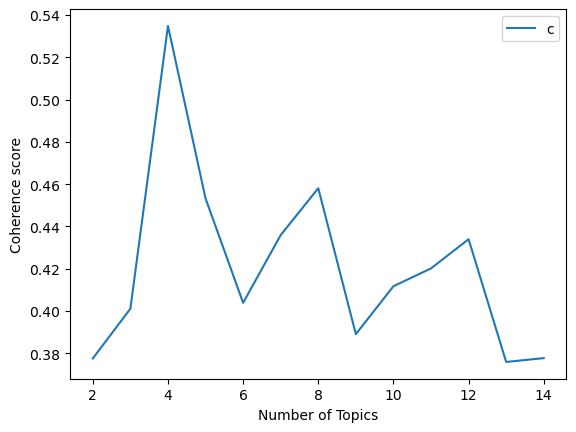

In [5]:
start, stop, step = 2, 15, 1
lsamodel.plot_coherence_graph(
    doc_clean=doc_clean,
    dictionary=dictionary,
    doc_term_matrix=doc_term_matrix,
    start=start,
    stop=stop,
    step=step,
)


In [43]:
# %%
num_of_topics = 4
num_of_words = 20
lsamodel.init_model(dictionary, doc_term_matrix, num_of_topics=num_of_topics)

In [44]:
sla_df = pd.DataFrame(lsamodel.return_model_params(num_of_topics, num_of_words))

In [45]:
import matplotlib.pyplot as plt

In [46]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [47]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

In [48]:
cloud = WordCloud(stopwords=[],
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=100,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

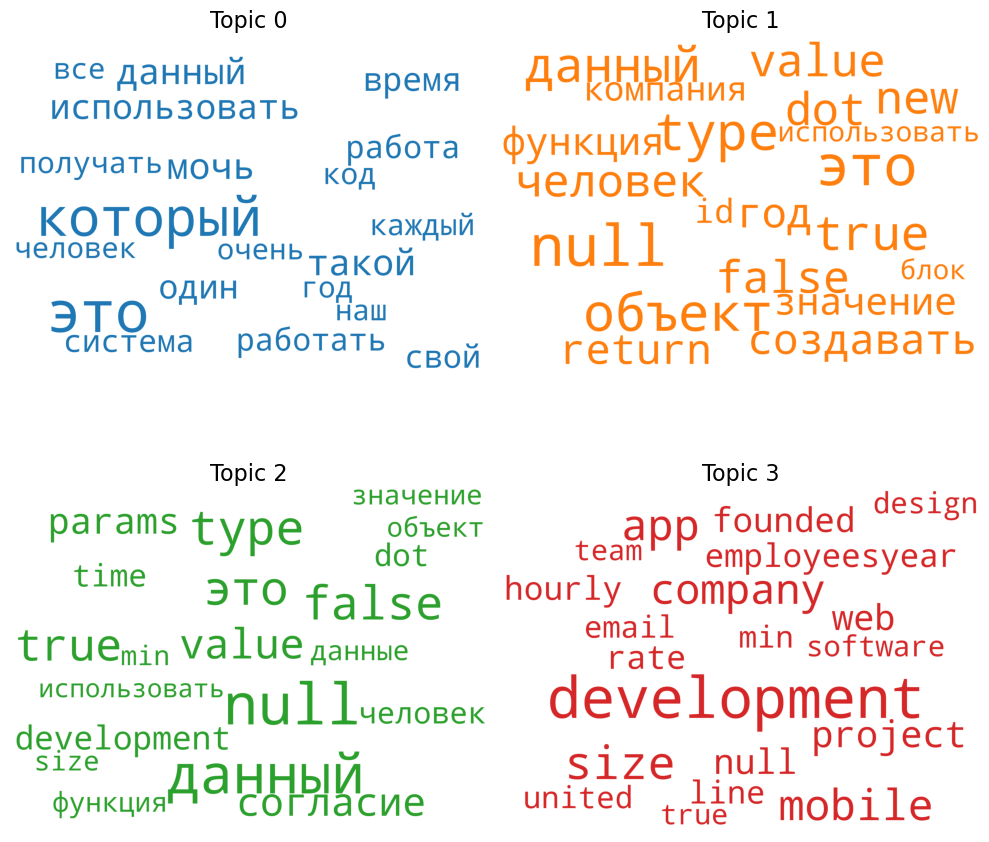

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = {i:abs(k) for i,k in zip(sla_df.iloc[i,1], sla_df.iloc[i,0])}
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()